In [1]:
#imports

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


from pandas import Series, DataFrame


plt.style.use('seaborn-v0_8')

In [2]:
#loading data into dataframe  - task1
toyota = pd.read_csv('/Users/anilthapa/Documents/Datasets/Data-Science Class/toyota.csv')

In [3]:
#checking the shape of dataframe. The number of features is 9, and the number of records is 6738.
toyota.shape

(6738, 9)

In [4]:
toyota.head(n= 10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
5,GT86,2017,15998,Manual,26919,Petrol,260,36.2,2.0
6,GT86,2017,18522,Manual,10456,Petrol,145,36.2,2.0
7,GT86,2017,18995,Manual,12340,Petrol,145,36.2,2.0
8,GT86,2020,27998,Manual,516,Petrol,150,33.2,2.0
9,GT86,2016,13990,Manual,37999,Petrol,265,36.2,2.0


In [5]:
#checking the features data types an null count
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [6]:
#checking the statistics of numerical data
toyota.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


In [7]:
#checking null values accorss the columns
toyota.isna().any()

model           False
year            False
price           False
transmission    False
mileage         False
fuelType        False
tax             False
mpg             False
engineSize      False
dtype: bool

In [8]:
#checking the duplicated value
#We can see that the amount of duplicated values are really small.
#By checking close we only observed four true duplicated value.
duplicates = toyota.duplicated()
toyota[duplicates]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
178,Corolla,2019,17960,Manual,4500,Petrol,145,39.2,1.2
286,Corolla,2019,15991,Manual,10,Petrol,145,39.2,1.2
397,RAV4,2016,17495,Automatic,58100,Hybrid,20,55.4,2.5
398,RAV4,2017,16295,Manual,34633,Diesel,125,60.1,2.0
446,RAV4,2014,10999,Manual,57942,Diesel,145,53.0,2.0
459,RAV4,2015,13500,Manual,45757,Diesel,125,57.6,2.0
460,RAV4,2015,13500,Manual,45757,Diesel,125,57.6,2.0
764,RAV4,2016,18795,Automatic,57000,Hybrid,20,55.4,2.5
1178,Yaris,2016,10495,Automatic,33705,Hybrid,0,86.0,1.5
1414,Yaris,2016,9495,Automatic,26191,Petrol,30,58.0,1.3


In [9]:
#We are heading to regression task.
#So, we can drop duplicated value for now
#(459 460)
#(4283 4284)
#(4516 4517)
#(5488 5489)
#dropping the 2nd duplicated value
index_to_drop = [460, 4284, 4517, 5489]
toyota.drop(index_to_drop, inplace=True)

In [10]:
#all the feature columns
toyota.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

<Axes: >

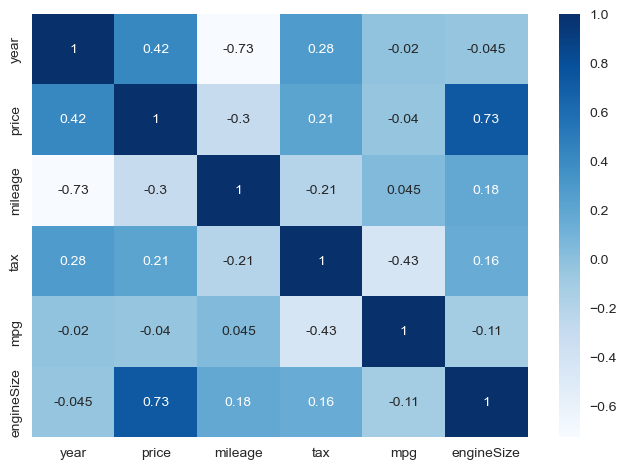

In [11]:
#using seaborn heatmap to see the correlation among features
toyota_numerical = toyota[['year', 'price', 'mileage','tax',
       'mpg', 'engineSize']].copy()
sns.heatmap(toyota_numerical.corr(), annot=True, cmap='Blues')

From the above figure, we can see positive corelation between engineSize and prices.
Further, there is negative coorelation between mileage and year.

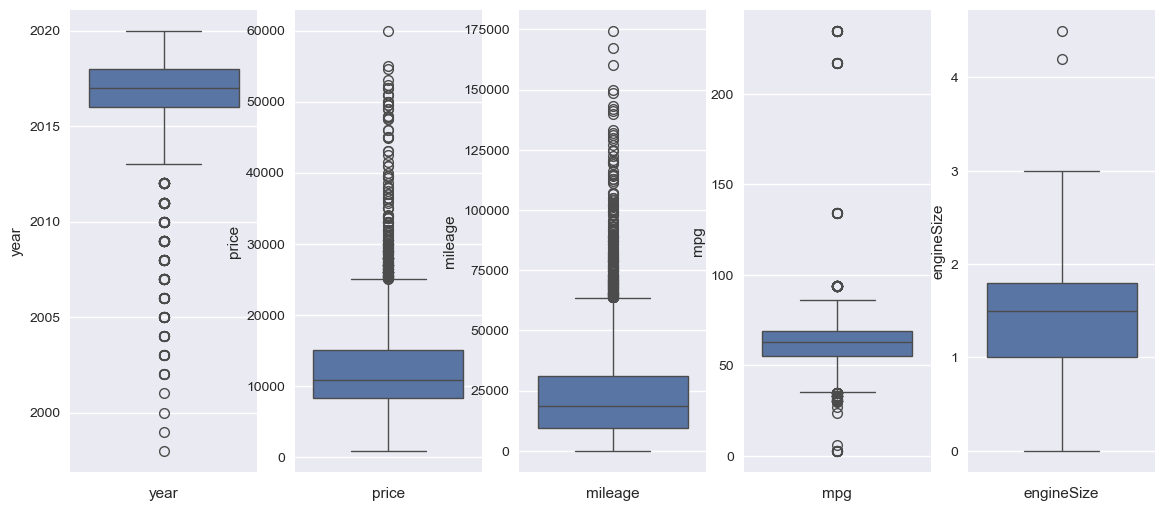

In [12]:
#creating box plot of each numerical features to see our outliers
#We can ignore tax for visuliaztion stuff
features = ['year', 'price', 'mileage', 'mpg', 'engineSize']

fig1, ax1 = plt.subplots(nrows=1, ncols=5, figsize = (14,6))
for i, feature in enumerate(features):
    sns.boxplot(toyota[feature], vert = True, ax = ax1[i])
    ax1[i].set_xlabel(feature)

plt.show() 

ways to handle the box plot now

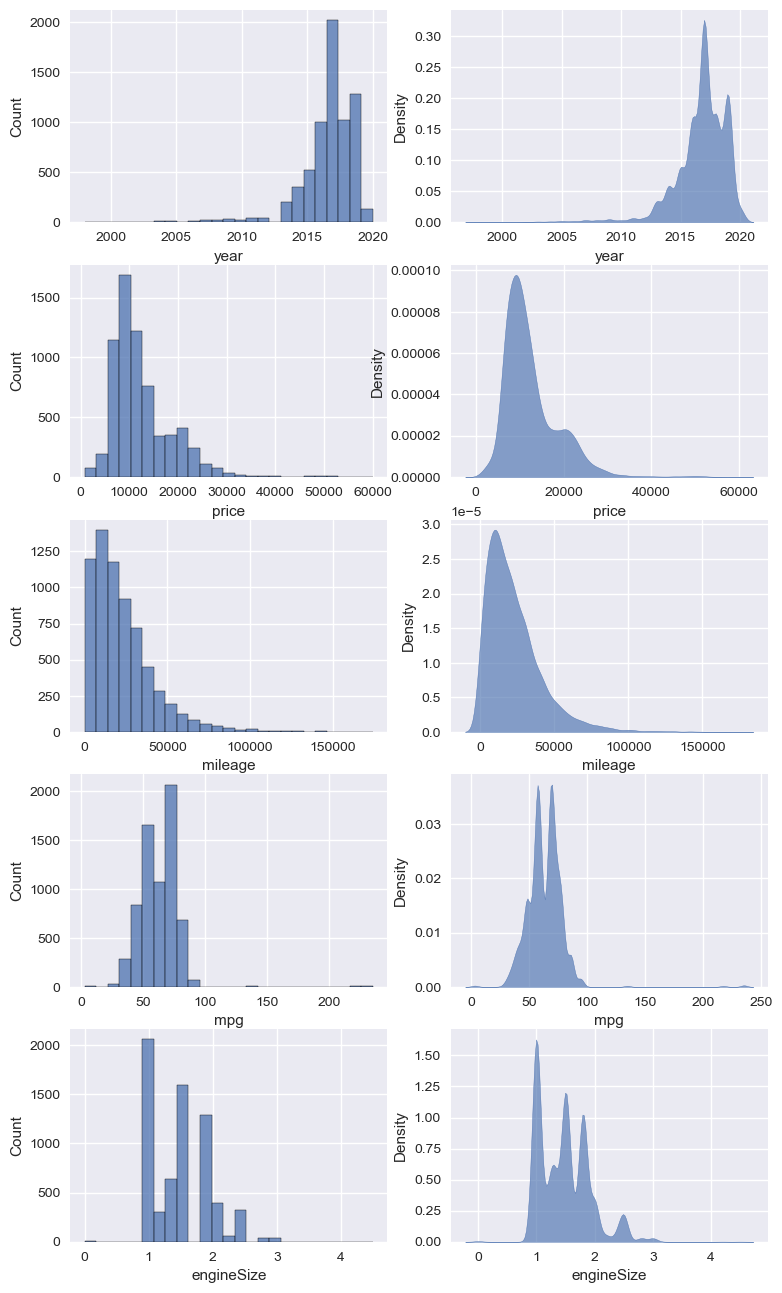

In [13]:
#creating histogram and density plot of the distribution
features = ['year', 'price', 'mileage', 'mpg', 'engineSize']
fig2, ax2 = plt.subplots(nrows=5, ncols=2, figsize = (9, 16))
for i, feature in enumerate(features):
    sns.histplot(toyota[feature], bins = 25, ax = ax2[i, 0])
    sns.kdeplot(toyota[feature],fill=True, alpha = 0.65,ax = ax2[i, 1])
    
plt.show()

In [14]:
#now seeing the categorical variables 
toyota_categorical = toyota[['model', 'transmission', 'fuelType']].copy()
toyota_categorical

,model,transmission,fuelType
0,GT86,Manual,Petrol
1,GT86,Manual,Petrol
2,GT86,Manual,Petrol
3,GT86,Manual,Petrol
4,GT86,Manual,Petrol
...,...,...,...
6733,IQ,Automatic,Petrol
6734,Urban Cruiser,Manual,Petrol
6735,Urban Cruiser,Manual,Diesel
6736,Urban Cruiser,Manual,Petrol


In [15]:
toyota_categorical['model'].unique()

array([' GT86', ' Corolla', ' RAV4', ' Yaris', ' Auris', ' Aygo', ' C-HR',
       ' Prius', ' Avensis', ' Verso', ' Hilux', ' PROACE VERSO',
       ' Land Cruiser', ' Supra', ' Camry', ' Verso-S', ' IQ',
       ' Urban Cruiser'], dtype=object)

In [16]:
toyota_categorical['transmission'].unique()

array(['Manual', 'Automatic', 'Semi-Auto', 'Other'], dtype=object)

In [17]:
toyota_categorical['fuelType'].unique()

array(['Petrol', 'Other', 'Hybrid', 'Diesel'], dtype=object)

In [18]:
#using OneHotEncoder() to convert categorical features (transmission) into numerical values
one_hot_encoder = OneHotEncoder(sparse_output = False)

encoded_transmission = pd.DataFrame(one_hot_encoder.fit_transform(data['transmission'].values.reshape(-1,1)), columns = one_hot_encoder.get_feature_names_out(['transmission']))
encoded_transmission

NameError: name 'OneHotEncoder' is not defined

In [ ]:
#doing the same thing for another categorical features ()
encoded_fuel_type = pd.DataFrame(one_hot_encoder.fit_transform(data['fuelType'].values.reshape(-1,1)), columns = one_hot_encoder.get_feature_names_out(['fuel_type']))
encoded_fuel_type

In [ ]:
#now concatenating both to original dataframe
data_encoded = pd.concat([data, encoded_transmission], axis = 1).drop('transmission', axis = 1)
data_encoded

In [ ]:
data_encoded_final = pd.concat([data_encoded, encoded_fuel_type], axis = 1).drop('fuelType', axis = 1)
data_encoded_final

In [ ]:
#now working on continouos variables
#year -  lets see the distribution of year
fig, ax = plt.subplots(ncols= 2, nrows = 1, figsize = (10,4))

sns.histplot(data['year'], bins = 25, alpha = 0.7, label = 'Histogram', ax = ax[0])
ax[0].set_title('histogram of the year')
ax[0].set_xlabel('Count')
ax[0].set_ylabel('year')

sns.kdeplot(data['year'], fill = True,alpha =0.7,  label = 'KDE', ax = ax[1])
ax[1].set_title('KDE plot of the year')
ax[1].set_xlabel('Density')
ax[1].set_ylabel('Year')

# Show legend
ax[0].legend(labels='Histogram', loc = 'upper left')
ax[1].legend(labels = 'KDE', loc = 'upper left')
plt.show()

#From the figure its clearly seen that it is left-skewed and the distribution does not follow normal distribution

In [ ]:
#now lets see the distribution of prices
fig1, ax1 = plt.subplots(nrows=1, ncols=2, figsize = (12,5))

sns.histplot(data['price'],bins = 20, ax = ax1[0])
ax1[0].set_title('histogram of price')
ax1[0].set_xlabel('Count')
ax1[0].set_ylabel('Price')

sns.kdeplot(data['price'],fill=True, alpha = 0.6, ax = ax1[1])
ax1[1].set_title('KDE plot of price')
ax1[1].set_xlabel('Density')
ax1[1].set_ylabel('Price')

plt.show()

#from the figure it is evident that price is right skewed but somewhat retains the shape of a normal distribution

In [ ]:
#we can drop taxes columns because we have price columsn
data.drop('tax', axis = 1, inplace=True)

In [ ]:
data

In [ ]:
#now lets plot the remaining three features using single matplotlib
features = ['mileage', 'mpg', 'engineSize']
fig2, ax2 = plt.subplots(nrows = 3, ncols = 2, figsize = (10,12))
for i in range(3):
    sns.histplot(data[features[i]], bins = 25, ax = ax2[i,0])
    sns.kdeplot(data[features[i]], fill=True, ax = ax2[i,1], alpha = 0.65)

plt.show()

In [ ]:
#From the above obeservation we can see that the total mileage is somewhat normally distributed with right skewed
#the mileage somehow has two peaks in the middle
#the enginsize however has a unknow distribution from domain knowledge engine size should however be a discrete value

In [ ]:
data

In [ ]:
data_encoded_final

In [ ]:
data.columns

In [ ]:
data_corr = data[['year', 'price', 'mileage', 'mpg',
       'engineSize']]
data_corr = data_corr.corr()

In [ ]:
sns.heatmap(data_corr, annot= True, cmap='Blues')
plt.show()

In [ ]:
#From above figure we can say that mileage and year are negatively corelated
#engine size and price, however; seems to be positively correlated